<a href="https://colab.research.google.com/github/Chen-Wi-Ki/Signal-Processing-My-Notes/blob/main/Analog_and_Digital_about_IO_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 此問題用於描述數位訊號IO與類比訊號IO之程式處理方式

In [ ]:
import random
#等比數列
array1 = range(100)
for i in array1:
  print(i,end='\t')
print('\n')

#恆等0的數列
array2 = [0] *100
for i in array2:
  print(i,end='\t')
print('\n')

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	



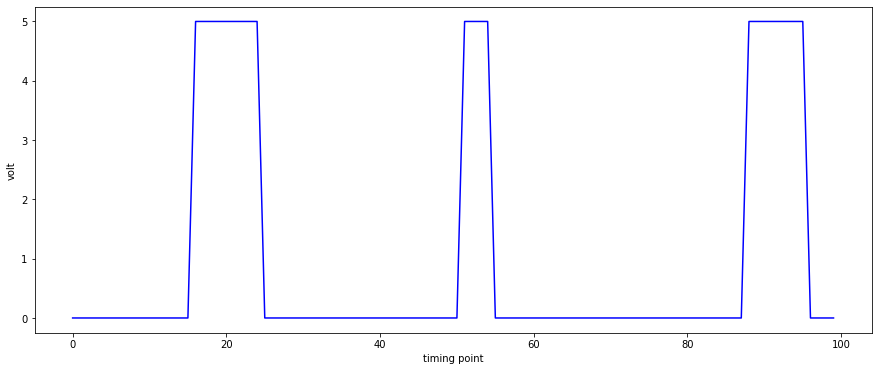

In [ ]:
#這是數位IO
from matplotlib import pyplot as plt
plt.figure(figsize = (15,6))
plt.xlabel("timing point")
plt.ylabel("volt")#假設是電壓形式
array2[16]=5
array2[17]=5
array2[18]=5
array2[19]=5
array2[20]=5
array2[21]=5
array2[22]=5
array2[23]=5
array2[24]=5
array2[51]=5
array2[52]=5
array2[53]=5
array2[54]=5
array2[88]=5
array2[89]=5
array2[90]=5
array2[91]=5
array2[92]=5
array2[93]=5
array2[94]=5
array2[95]=5
plt.plot(array2,color='blue')

# 一般常見的數位訊號

(如上圖)

原則上不論是值的範圍多少它遵循著0與1的值變，例如電路中不是高電位就是低電位。

1時才有意義，0時不需做任何控制,所以0時除非有特殊目的否則一般是不傳送任何資訊，藉此達到節約效能之目的。

這種輸入方式建議設計成模擬電腦鍵盤按鍵方法做輸入，這樣debug也容易許多，也沒有Serial Port選擇的必要。

In [ ]:
import numpy as np
#sin波訊號產生器
def sin_wave(A,f,fs,phi,t):#A=振幅/f=訊號頻率/fs=採樣頻率/phi=相位/t=時間長度
  Ts=1/fs
  n=t/Ts
  n=np.arange(n)
  y=A*np.sin(2*np.pi*f*n*Ts+phi*(np.pi/180))
  return y

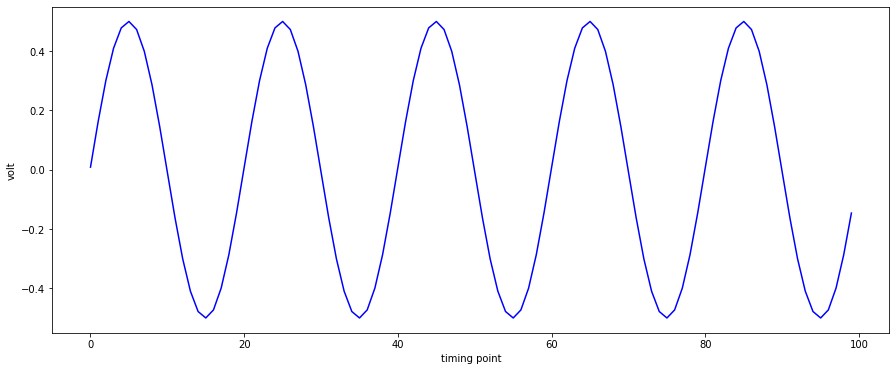

In [ ]:
#產生一旋波,它是類比中常出現的低雜訊號
A=0.5
f=5
fs=100
phi=1
t=1
array3 = sin_wave(A,f,fs,phi,t)
plt.figure(figsize = (15,6))
plt.xlabel("timing point")
plt.ylabel("volt")#假設是電壓形式
plt.plot(array3,color='blue')

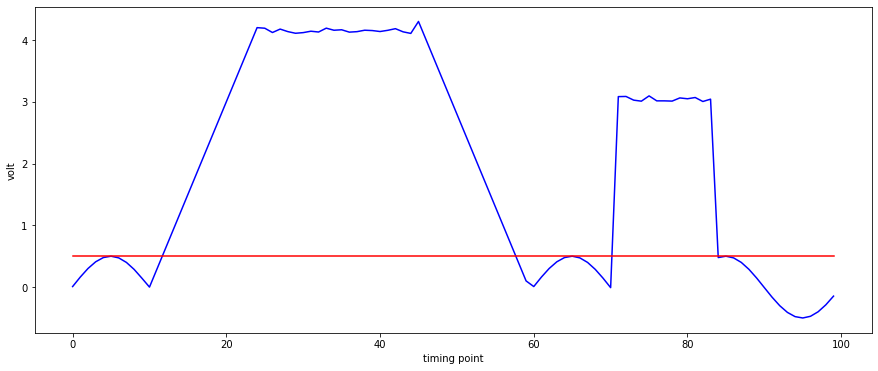

In [ ]:
#這是類比IO
from matplotlib import pyplot as plt
plt.figure(figsize = (15,6))
plt.xlabel("timing point")
plt.ylabel("volt")#假設是電壓形式

for i in range(10,84,1):
  if i<25: 
    array3[i]=0.5+0.3*i-3.5
  
  if i>=25 and i<45: 
    array3[i]=random.uniform(4.1,4.2)

  if i>=45 and i<60:
    array3[i]=2.7-0.3*i+15.1

  if i>70:
    array3[i]=random.uniform(3,3.1)

plt.plot(array3,color='blue')
#恆等0.6的數列
array33 = [0.5] *100
plt.plot(array33,color='red')
plt.show()

# 一般常見的類比訊號

(如上圖)

通常會有低頻段雜訊與高頻段不確定的連續訊號。

I/O控制上資訊通常會實現'資料是否有變化'之判斷後才決定發送'變化後的數據'。

而低頻段訊號需截止掉，保留紅線上半部的訊號變化即可，低於紅線段的訊號都會等效為0點。

更好的IO設計是，會使紅線以上的訊號映射成要用的數據範圍或者歸一化成0~1